# Phase 0

## Initialisation

In [1]:
!pip install geopandas
!pip install pygeodesy
!pip install pygeodesic
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.5/990.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.3/984.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import folium
import numpy as np
import pdb
import time
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
from geopy.distance import geodesic

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#import statsmodels.api as sm
import statsmodels.formula.api as sma

from scipy.spatial import cKDTree


## Data Importation

In [3]:
# Iris Paris
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Iris/Clean/data_iris_paris.geojson'
irisparis = gpd.read_file(file_path)
irisparis.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,shape_Area,geo_point,dep,insee_com,nom_com,iris,code_iris,nom_iris,typ_iris,geometry
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,80920.786958,"{'lon': 2.33473231093, 'lat': 48.8955334043}",75,75118,Paris 18e Arrondissement,6922,751186922,Grandes Carrieres 22,H,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ..."
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,68661.340091,"{'lon': 2.3297484576, 'lat': 48.8945094182}",75,75118,Paris 18e Arrondissement,6923,751186923,Grandes Carrieres 23,H,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ..."
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,73724.514027,"{'lon': 2.3308879204, 'lat': 48.8967235402}",75,75118,Paris 18e Arrondissement,6924,751186924,Grandes Carrieres 24,H,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ..."
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,81608.212989,"{'lon': 2.33742640417, 'lat': 48.8971849905}",75,75118,Paris 18e Arrondissement,6925,751186925,Grandes Carrieres 25,H,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ..."
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,176037.028979,"{'lon': 2.34037476455, 'lat': 48.8999631892}",75,75118,Paris 18e Arrondissement,6926,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ..."


In [4]:
# Immobilier
file_path2 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Immobilier/Clean/Train/75immo_clean_2022.csv'
apartments = pd.read_csv(file_path2)
apartments.head(5)

,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,0,2022-1621603,2022-01-06,1,Vente,605000.0,51.0,NaN,RUE CHARLOT,1880,...,Appartement,42.0,3.0,NaN,NaN,NaN,NaN,NaN,2.362871,48.863374
1,1,2022-1621616,2022-01-07,1,Vente,660000.0,141.0,NaN,RUE DES POISSONNIERS,7564,...,Appartement,81.0,3.0,NaN,NaN,NaN,NaN,NaN,2.352517,48.895742
2,2,2022-1621619,2022-01-07,1,Vente,293000.0,7.0,NaN,RUE SAINT-MARC,8686,...,Appartement,22.0,1.0,NaN,NaN,NaN,NaN,NaN,2.341378,48.870214
3,3,2022-1621625,2022-01-05,1,Vente,300000.0,55.0,NaN,RUE STEPHENSON,9092,...,Appartement,38.0,1.0,NaN,NaN,NaN,NaN,NaN,2.355461,48.889540
4,4,2022-1621629,2022-01-05,1,Vente,335000.0,75.0,NaN,AV NIEL,6773,...,Appartement,33.0,2.0,NaN,NaN,NaN,NaN,NaN,2.295735,48.882706


In [5]:
# Amenité
file_path3 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Amenite/Clean/amenite_geometry.geojson'
amenite = gpd.read_file(file_path3)
amenite.head(5)

,ide,longitude,latitude,geometry
0,terrasses-autorisations_0,2.337336,48.879644,POINT (2.33734 48.87964)
1,terrasses-autorisations_1,2.313040,48.831376,POINT (2.31304 48.83138)
2,terrasses-autorisations_2,2.342332,48.856313,POINT (2.34233 48.85631)
3,terrasses-autorisations_3,2.342860,48.892071,POINT (2.34286 48.89207)
4,terrasses-autorisations_4,2.368621,48.854266,POINT (2.36862 48.85427)


In [6]:
# Immobilier Geometry
file_path4 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Immobilier/Clean/Train/immo_geometry.geojson'
immobilier = gpd.read_file(file_path4)
immobilier.head(5)

,id_mutation,longitude,latitude,geometry
0,2018-743589,2.337476,48.866524,POINT (2.33748 48.86652)
1,2018-743594,2.310473,48.870036,POINT (2.31047 48.87004)
2,2018-743596,2.352721,48.864270,POINT (2.35272 48.86427)
3,2018-743597,2.358997,48.863836,POINT (2.35900 48.86384)
4,2018-743600,2.365106,48.860541,POINT (2.36511 48.86054)


In [7]:
# Iris Revenu
file_path5 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Revenu/Clean/75revenu.csv'
revenu = pd.read_csv(file_path5, sep=';')
revenu.head()


,Unnamed: 0,IRIS,DEC_PIMP20,DEC_TP6020,DEC_Q120,DEC_MED20,DEC_Q320,DEC_EQ20,DEC_D120,DEC_D220,...,DEC_S80S2020,DEC_GI20,DEC_PACT20,DEC_PTSA20,DEC_PCHO20,DEC_PBEN20,DEC_PPEN20,DEC_PAUT20,DEC_NOTE20,keep
0,9761,751010101,ns,ns,ns,ns,ns,ns,ns,ns,...,ns,ns,ns,ns,ns,ns,ns,ns,so,1
1,9762,751010102,ns,ns,ns,ns,ns,ns,ns,ns,...,ns,ns,ns,ns,ns,ns,ns,ns,so,1
2,9763,751010103,ns,ns,ns,ns,ns,ns,ns,ns,...,ns,ns,ns,ns,ns,ns,ns,ns,so,1
3,9764,751010104,ns,ns,ns,ns,ns,ns,ns,ns,...,ns,ns,ns,ns,ns,ns,ns,ns,so,1
4,9765,751010105,nd,nd,nd,nd,nd,nd,nd,nd,...,nd,nd,nd,nd,nd,nd,nd,nd,so,1


In [8]:
# Paris Housing
file_path6 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/ParisHousing/ParisHousing.csv'
ParisHousing = pd.read_csv(file_path6, sep=',')
ParisHousing.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [9]:
# Merge the dataframes on the 'IRIS' and 'c_ir' columns
revenuiris = pd.merge(irisparis, revenu[['IRIS', 'DEC_MED20']], left_on='c_ir', right_on='IRIS', how='left')

# Drop the redundant 'IRIS' column
revenuiris.drop('IRIS', axis=1, inplace=True)
revenuiris.set_geometry('geometry', inplace=True)
revenuiris.head(5)

,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,geo_point,dep,insee_com,nom_com,iris,code_iris,nom_iris,typ_iris,geometry,DEC_MED20
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,"{'lon': 2.33473231093, 'lat': 48.8955334043}",75,75118,Paris 18e Arrondissement,6922,751186922,Grandes Carrieres 22,H,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ...",34720
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,"{'lon': 2.3297484576, 'lat': 48.8945094182}",75,75118,Paris 18e Arrondissement,6923,751186923,Grandes Carrieres 23,H,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ...",22870
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,"{'lon': 2.3308879204, 'lat': 48.8967235402}",75,75118,Paris 18e Arrondissement,6924,751186924,Grandes Carrieres 24,H,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ...",21030
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,"{'lon': 2.33742640417, 'lat': 48.8971849905}",75,75118,Paris 18e Arrondissement,6925,751186925,Grandes Carrieres 25,H,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ...",15700
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,"{'lon': 2.34037476455, 'lat': 48.8999631892}",75,75118,Paris 18e Arrondissement,6926,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ...",12410


# Phase 1

In [ ]:
apartments2 = apartments.copy()

## closest IRIS to each apartment

In [ ]:
apartments2['geometry'] = [Point(xy) for xy in zip(apartments2['longitude'], apartments2['latitude'])]
apartments2['closest_ir'] = None

In [ ]:
iris_geometries = irisparis['geometry'].tolist()

In [ ]:
# Loop to find the closest IRIS to each apartment
for index, apt_point in apartments2['geometry'].items():
    print(index)
    matches = apt_point.within(iris_geometries)
    match_index = np.where(matches)[0][0]

    apartments2.at[index, 'closest_ir'] = irisparis.at[match_index, 'c_ir']

Streaming output truncated to the last 5000 lines.
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379
8380
8381
8382
8383
8384
8385
8386
8387
8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400
8401

## median price per m2 based on the IRIS

In [ ]:
apartments2['prix_per_m2'] = apartments2['valeur_fonciere'] / apartments2['surface_reelle_bati']

In [ ]:
# median price per m2 based on the IRIS
grouped_prices = apartments2.groupby('closest_ir')['prix_per_m2'].median()


In [ ]:
# adding the median price to the 'irisparis'

irisparismedprix = irisparis.merge(grouped_prices, how='left', left_on='c_ir', right_index=True)

Text(0.5, 1.0, 'Iris Data with Mean Price Gradient')

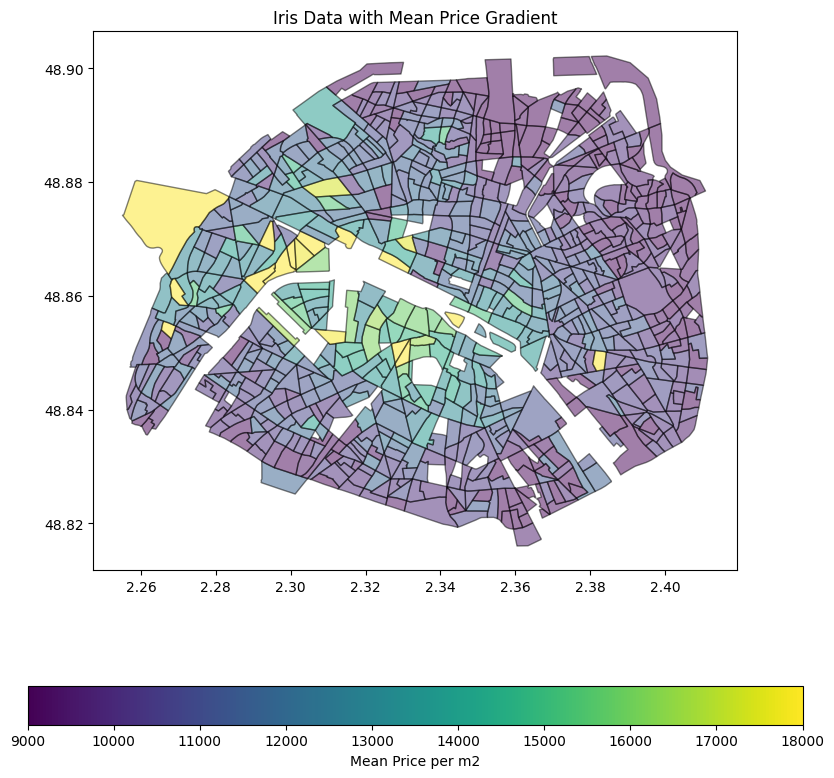

In [ ]:
norm = colors.Normalize(vmin=9000, vmax=18000)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot
irisparismedprix.plot(ax=ax, alpha=0.5, edgecolor='k', column='prix_per_m2', cmap='viridis',
               legend=True, legend_kwds={'label': "Mean Price per m2", 'orientation': "horizontal"},
               norm=norm)


# Details
plt.title('Iris Data with Mean Price Gradient')

## Correlation analysis

In [ ]:
# merging apartments and revenu

apartmentsrevenu = pd.merge(apartments2, revenu, how='left', left_on='closest_ir', right_on='IRIS')

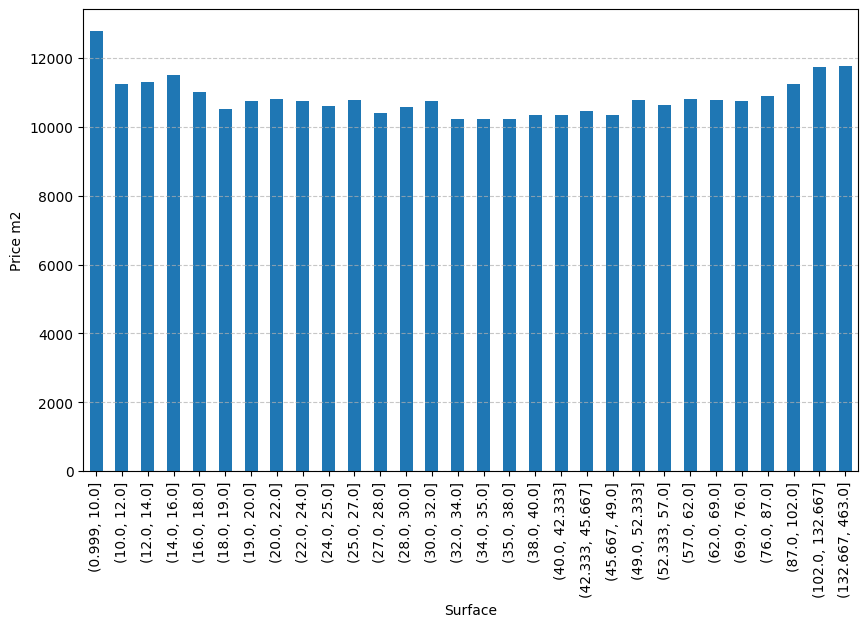

In [ ]:
### NEW PLOT THAT THE PROF ASKED ###

# Create clusters
apartmentsrevenu['surface_cluster'] = pd.qcut(apartmentsrevenu['surface_reelle_bati'], 30)

#average 'prix_per_m2' for each cluster
avg_prices = apartmentsrevenu.groupby('surface_cluster')['prix_per_m2'].median()


# Plot
plt.figure(figsize=(10, 6))
avg_prices.plot(kind='bar')
plt.xlabel('Surface')
plt.ylabel('Price m2')

plt.grid(axis='y', linestyle='--', alpha=0.7)


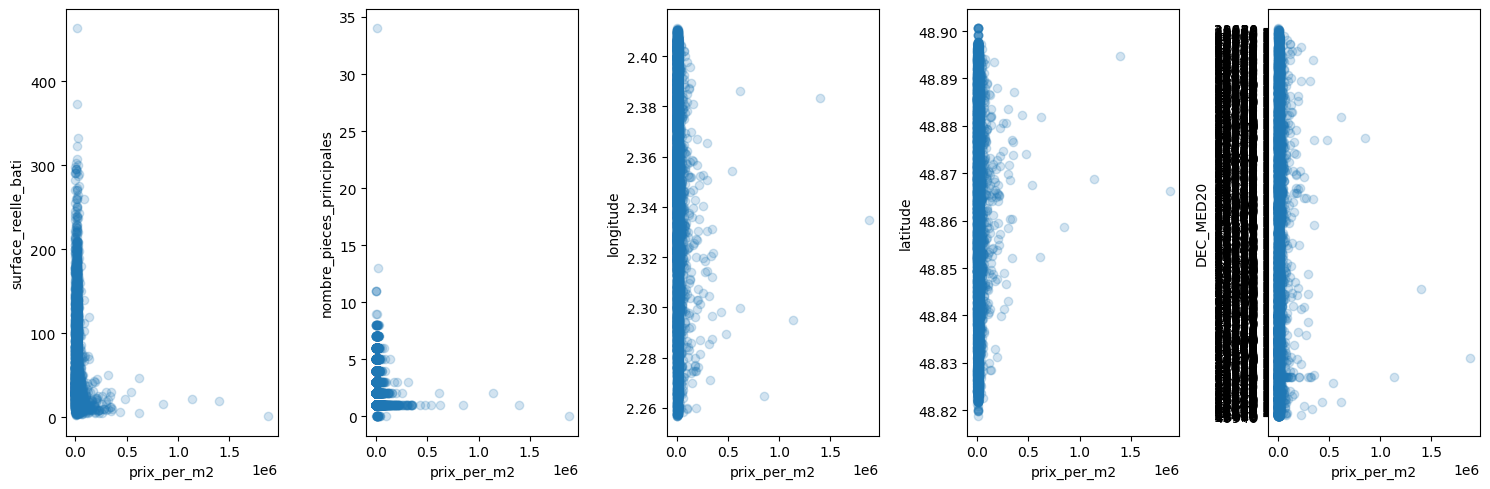

In [ ]:
# Specify the columns to include in the correlation analysis
columns_to_include = ['surface_reelle_bati', 'nombre_pieces_principales',
                      'longitude', 'latitude', 'DEC_MED20']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_include), figsize=(15, 5))

# Iterate over each column and create a plot
for i, col in enumerate(columns_to_include):
    # Plot scatter plot
    axes[i].scatter(apartmentsrevenu['prix_per_m2'], apartmentsrevenu[col], alpha=0.2)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('prix_per_m2')

plt.tight_layout()


Price Range: 6453.2467532467535 - 16448.084388185664
Number of data points in apartmentsrevenu: 13212
Number of data points in apartmentsrevenu_cleaned: 10563


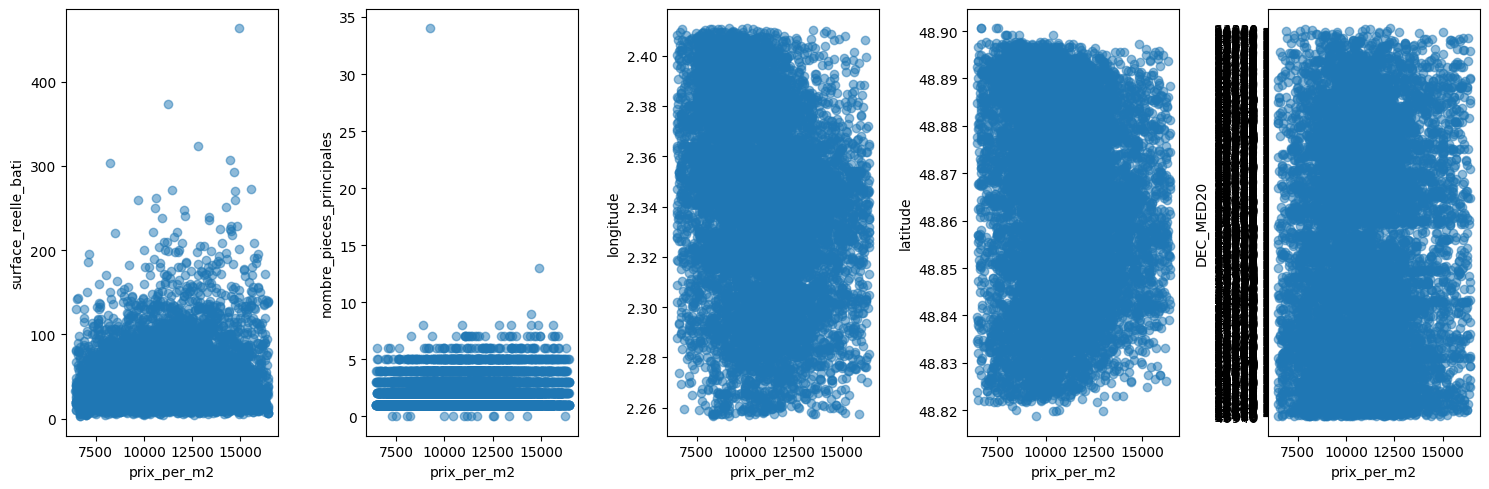

In [ ]:
# Remove rows with NaN values in 'prix_per_m2' column
apartmentsrevenu_cleaned = apartmentsrevenu.dropna(subset=['prix_per_m2'])

# Specify the percentile range to consider (e.g., from 10th to 90th percentile)
percentile_range = [10, 90]

# Calculate the price range based on the specified percentile
price_min = np.percentile(apartmentsrevenu_cleaned['prix_per_m2'], percentile_range[0])
price_max = np.percentile(apartmentsrevenu_cleaned['prix_per_m2'], percentile_range[1])

print("Price Range:", price_min, "-", price_max)

# Filter the dataframe to include only prices within the specified percentile range
df_filtered = apartmentsrevenu_cleaned[(apartmentsrevenu_cleaned['prix_per_m2'] >= price_min) & (apartmentsrevenu_cleaned['prix_per_m2'] <= price_max)]

print("Number of data points in apartmentsrevenu:", len(apartmentsrevenu))
print("Number of data points in apartmentsrevenu_cleaned:", len(df_filtered))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_include), figsize=(15, 5))

# Iterate over each column and create a plot
for i, col in enumerate(columns_to_include):
    # Plot scatter plot using filtered data
    axes[i].scatter(df_filtered['prix_per_m2'], df_filtered[col], alpha=0.5)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('prix_per_m2')

plt.tight_layout()
plt.show()


## Modeling

In [ ]:
apartmentsrevenu = apartmentsrevenu[apartmentsrevenu['DEC_MED20'] != 'ns']
apartmentsrevenu.dropna(subset=['prix_per_m2'], inplace=True)
apartmentsrevenu.shape

<ipython-input-33-0495e8d7c3c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartmentsrevenu.dropna(subset=['prix_per_m2'], inplace=True)


(12995, 74)

In [ ]:
import statsmodels.api as sm


In [ ]:
geometry = [Point(xy) for xy in zip(apartmentsrevenu['longitude'], apartmentsrevenu['latitude'])]
gdf = gpd.GeoDataFrame(apartmentsrevenu, geometry=geometry, crs="EPSG:4326")


# Convert to a new CRS (EPSG 2154)
gdf_crs = gdf.to_crs(epsg=2154)


apartmentsrevenu['new_longitude'] = gdf_crs.geometry.x
apartmentsrevenu['new_latitude'] = gdf_crs.geometry.y

selected_columns = ['DEC_MED20', 'surface_reelle_bati', 'nombre_pieces_principales']
data = apartmentsrevenu[selected_columns]

target = apartmentsrevenu['prix_per_m2']

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.2, random_state=2024)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting
ols_model = sm.OLS(y_train, X_train)
ols_results = ols_model.fit()

# Predicting
predictions = ols_results.predict(X_test)


print(ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:            prix_per_m2   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     47.59
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.54e-30
Time:                        19:14:36   Log-Likelihood:            -1.2223e+05
No. Observations:               10396   AIC:                         2.445e+05
Df Residuals:                   10392   BIC:                         2.445e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.334e+04    303.157     44.007      0.0

# Phase 2

## Some Visualization

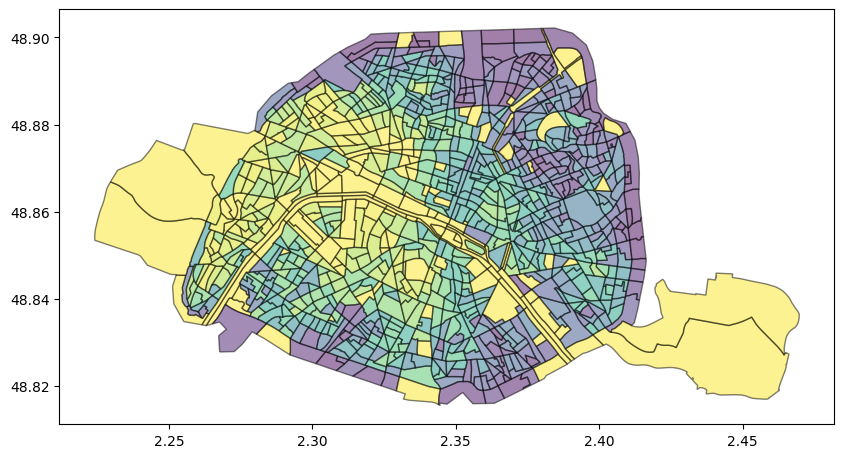

In [ ]:
# revenuiris on the map


norm = colors.Normalize(vmin=9000, vmax=18000)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot
revenuiris.plot(ax=ax, alpha=0.5, edgecolor='k', column='DEC_MED20', cmap='viridis',
               legend=False)
plt.show()

In [ ]:
revenuiris.columns

Index(['OBJECTID', 'n_sq_ir', 'c_cainsee', 'n_qu', 'c_ir', 'c_typeir', 'l_ir',
       'm2_ip', 'm2_pop', 'm2_emp', 'nb_pop', 'nb_pop_n5', 'nb_pop_1999',
       'nb_evo_pop', 'nb_evo_pop_n5', 'pct_evo_pop', 'pct_evo_pop_n5',
       'nb_surface', 'nb_densite', 'nb_p_age_0', 'nb_p_age_5', 'nb_p_age_10',
       'nb_p_age_15', 'nb_p_age_20', 'nb_p_age_25', 'nb_p_age_30',
       'nb_p_age_35', 'nb_p_age_40', 'nb_p_age_45', 'nb_p_age_50',
       'nb_p_age_55', 'nb_p_age_60', 'nb_p_age_65', 'nb_p_age_70',
       'nb_p_age_75', 'nb_p_age_80', 'nb_p_age_85', 'nb_p_age_90p',
       'nb_age_019', 'nb_age_60p', 'nb_age_65p', 'nb_age_75p', 'pct_age_019',
       'pct_age_60p', 'pct_age_65p', 'pct_age_75p', 'nb_age_019_n5',
       'nb_age_60p_n5', 'nb_age_65p_n5', 'nb_age_75p_n5', 'pct_age_019_n5',
       'pct_age_60p_n5', 'pct_age_65p_n5', 'pct_age_75p_n5', 'pct_evo_age_019',
       'pct_evo_age_60p', 'pct_evo_age_65p', 'pct_evo_age_75p', 'nb_etranger',
       'pct_etranger', 'nb_etranger_n5', 'pct_e

## Feature generation

### Distance to Eiffel tower

In [ ]:
# Coordinates of the Eiffel Tower
eiffel_tower_coords = (2.2945, 48.8584)

def calculate_distance(point1, point2):
    return geodesic(point1, point2).kilometers

# Calculate distance from each iris to the Eiffel Tower
revenuiris['distance_to_eiffel_tower'] = revenuiris['geometry'].apply(
    lambda geom: calculate_distance(geom.centroid.coords[0], eiffel_tower_coords)
)

revenuiris


,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,dep,insee_com,nom_com,iris,code_iris,nom_iris,typ_iris,geometry,DEC_MED20,distance_to_eiffel_tower
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,75,75118,Paris 18e Arrondissement,6922,751186922,Grandes Carrieres 22,H,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ...",34720,6.072739
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,75,75118,Paris 18e Arrondissement,6923,751186923,Grandes Carrieres 23,H,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ...",22870,5.600529
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,75,75118,Paris 18e Arrondissement,6924,751186924,Grandes Carrieres 24,H,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ...",21030,5.870012
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,75,75118,Paris 18e Arrondissement,6925,751186925,Grandes Carrieres 25,H,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ...",15700,6.411207
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,75,75118,Paris 18e Arrondissement,6926,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ...",12410,6.863844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,75,75119,Paris 19e Arrondissement,7405,751197405,Pont de Flandre 5,H,"POLYGON ((2.38437 48.89453, 2.38370 48.89564, ...",17030,10.483992
988,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,75,75113,Paris 13e Arrondissement,5108,751135108,Maison Blanche 8,H,"POLYGON ((2.35954 48.81888, 2.35952 48.81901, ...",15430,7.762496
989,2375,750004899,75114,54,751145401,H,Parc de Montsouris 1,361226.973089,51415.733963,101504.657933,...,75,75114,Paris 14e Arrondissement,5401,751145401,Parc de Montsouris 1,H,"POLYGON ((2.34398 48.81580, 2.34407 48.81742, ...",ns,6.423184
990,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,75,75115,Paris 15e Arrondissement,6001,751156001,Javel 1,H,"POLYGON ((2.27825 48.83608, 2.27695 48.83638, ...",16910,3.645824


In [ ]:
nearest_index = revenuiris['distance_to_eiffel_tower'].idxmin()
furthest_index = revenuiris['distance_to_eiffel_tower'].idxmax()

# Get the rows
nearest_row = revenuiris.loc[nearest_index]
furthest_row = revenuiris.loc[furthest_index]

print("Nearest to Eiffel Tower:")
print(nearest_row)
print("\nFurthest from Eiffel Tower:")
print(furthest_row)


Nearest to Eiffel Tower:
OBJECTID                                                                  782
n_sq_ir                                                             750004505
c_cainsee                                                               75107
n_qu                                                                       28
c_ir                                                                751072812
                                                  ...                        
nom_iris                                                        Champ de Mars
typ_iris                                                                    D
geometry                    POLYGON ((2.303924190650366 48.85324139622073,...
DEC_MED20                                                                  nd
distance_to_eiffel_tower                                             0.435404
Name: 620, Length: 83, dtype: object

Furthest from Eiffel Tower:
OBJECTID                                           

In [ ]:
# centroid coordinates of the nearest
nearest_x, nearest_y = nearest_row['geometry'].centroid.coords[0]

# centroid coordinates of the furthest
furthest_x, furthest_y = furthest_row['geometry'].centroid.coords[0]

print(nearest_x, nearest_y)
print(furthest_x, furthest_y)


2.297745570826208 48.85618355636227
2.440321400618132 48.82656016993193


### Distance to the center

In [ ]:
# Coordinates of the center
center_coords = (2.3522 ,48.8566)

def calculate_distance(point1, point2):
    return geodesic(point1, point2).kilometers

# Calculate distance from each iris to the center
revenuiris['distance_to_center'] = revenuiris['geometry'].apply(
    lambda geom: calculate_distance(geom.centroid.coords[0], center_coords)
)

revenuiris

,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,insee_com,nom_com,iris,code_iris,nom_iris,typ_iris,geometry,DEC_MED20,distance_to_eiffel_tower,distance_to_center
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,75118,Paris 18e Arrondissement,6922,751186922,Grandes Carrieres 22,H,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ...",34720,6.072739,4.741721
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,75118,Paris 18e Arrondissement,6923,751186923,Grandes Carrieres 23,H,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ...",22870,5.600529,4.890629
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,75118,Paris 18e Arrondissement,6924,751186924,Grandes Carrieres 24,H,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ...",21030,5.870012,5.043339
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,75118,Paris 18e Arrondissement,6925,751186925,Grandes Carrieres 25,H,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ...",15700,6.411207,4.802243
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,75118,Paris 18e Arrondissement,6926,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ...",12410,6.863844,4.989637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,75119,Paris 19e Arrondissement,7405,751197405,Pont de Flandre 5,H,"POLYGON ((2.38437 48.89453, 2.38370 48.89564, ...",17030,10.483992,5.301530
988,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,75113,Paris 13e Arrondissement,5108,751135108,Maison Blanche 8,H,"POLYGON ((2.35954 48.81888, 2.35952 48.81901, ...",15430,7.762496,4.250256
989,2375,750004899,75114,54,751145401,H,Parc de Montsouris 1,361226.973089,51415.733963,101504.657933,...,75114,Paris 14e Arrondissement,5401,751145401,Parc de Montsouris 1,H,"POLYGON ((2.34398 48.81580, 2.34407 48.81742, ...",ns,6.423184,4.539570
990,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,75115,Paris 15e Arrondissement,6001,751156001,Javel 1,H,"POLYGON ((2.27825 48.83608, 2.27695 48.83638, ...",16910,3.645824,9.088381


In [ ]:
nearest_index = revenuiris['distance_to_center'].idxmin()
furthest_index = revenuiris['distance_to_center'].idxmax()

# Get the rows
nearest_row = revenuiris.loc[nearest_index]
furthest_row = revenuiris.loc[furthest_index]
# centroid coordinates of the nearest
nearest_x, nearest_y = nearest_row['geometry'].centroid.coords[0]

# centroid coordinates of the furthest
furthest_x, furthest_y = furthest_row['geometry'].centroid.coords[0]

print(nearest_x, nearest_y)
print(furthest_x, furthest_y)

2.3533372642027697 48.85742929807181
2.2423837792477532 48.85512129873873


### Distance to 18th arrondis

In [ ]:
# Coordinates of the 18em
dixhuit_coords = (2.3444 ,48.8925)

def calculate_distance(point1, point2):
    return geodesic(point1, point2).kilometers

# Calculate distance from each iris to the 18em
revenuiris['distance_to_18'] = revenuiris['geometry'].apply(
    lambda geom: calculate_distance(geom.centroid.coords[0], dixhuit_coords)
)

revenuiris

,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,distance_to_center,is_west_side,median_apartment_size_filled,amenities_count,immobilier_count,avg_valeur_fonciere,median_price_per_m2,median_price_per_m2_filled,median_apartment_size,distance_to_18
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,4.741721,1,33.750000,23,24,1.791785e+05,5506.608466,5506.608466,33.0,1.119255
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,4.890629,1,41.583333,48,66,4.076100e+05,10030.000000,10030.000000,40.5,1.630268
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,5.043339,1,41.187500,35,68,4.377619e+05,8586.935705,8586.935705,35.5,1.556785
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,4.802243,1,23.000000,11,35,2.520000e+05,11230.769231,11230.769231,25.0,0.934233
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,4.989637,1,36.931818,41,1,NaN,NaN,9600.000000,NaN,0.933459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,1800,750004057,75119,73,751197317,H,Villette 17,36411.364147,26477.538502,36411.364147,...,4.603747,0,20.400000,1,14,2.445338e+05,11421.052632,11421.052632,19.0,2.991211
864,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,5.301530,0,36.000000,32,52,4.079026e+06,8217.391304,8217.391304,24.0,4.210906
865,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,4.250256,0,61.250000,22,1,NaN,NaN,11367.559524,NaN,8.286171
866,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,9.088381,1,38.083333,20,1,NaN,NaN,9863.695090,NaN,10.251327


### West East

ChatGPT: The expression revenuiris.total_bounds returns the bounding box of the entire Paris area covered by the revenuiris dataset. This bounding box is a tuple containing the minimum and maximum values of the x (longitude) and y (latitude) coordinates.

In the expression revenuiris.total_bounds[0] + revenuiris.total_bounds[2]) / 2, we're taking the sum of the minimum and maximum longitudes (which correspond to the first and third elements of the total_bounds tuple) and then dividing by 2. This operation finds the midpoint longitude of the bounding box, effectively giving us a longitude value that divides Paris into two halves.

In [ ]:
# longitude that divides Paris into two halves
paris_longitude_divider = (revenuiris.total_bounds[0] + revenuiris.total_bounds[2]) / 2

# if an iris is on the west side
def is_west_side(geometry):
    centroid_longitude = geometry.centroid.x
    return centroid_longitude <= paris_longitude_divider

# if the iris is on the west side (1) or the east side (0)
revenuiris['is_west_side'] = revenuiris['geometry'].apply(lambda geom: 1 if is_west_side(geom) else 0)

revenuiris

,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,nom_com,iris,code_iris,nom_iris,typ_iris,geometry,DEC_MED20,distance_to_eiffel_tower,distance_to_center,is_west_side
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,Paris 18e Arrondissement,6922,751186922,Grandes Carrieres 22,H,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ...",34720,6.072739,4.741721,1
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,Paris 18e Arrondissement,6923,751186923,Grandes Carrieres 23,H,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ...",22870,5.600529,4.890629,1
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,Paris 18e Arrondissement,6924,751186924,Grandes Carrieres 24,H,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ...",21030,5.870012,5.043339,1
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,Paris 18e Arrondissement,6925,751186925,Grandes Carrieres 25,H,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ...",15700,6.411207,4.802243,1
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,Paris 18e Arrondissement,6926,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ...",12410,6.863844,4.989637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,Paris 19e Arrondissement,7405,751197405,Pont de Flandre 5,H,"POLYGON ((2.38437 48.89453, 2.38370 48.89564, ...",17030,10.483992,5.301530,0
988,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,Paris 13e Arrondissement,5108,751135108,Maison Blanche 8,H,"POLYGON ((2.35954 48.81888, 2.35952 48.81901, ...",15430,7.762496,4.250256,0
989,2375,750004899,75114,54,751145401,H,Parc de Montsouris 1,361226.973089,51415.733963,101504.657933,...,Paris 14e Arrondissement,5401,751145401,Parc de Montsouris 1,H,"POLYGON ((2.34398 48.81580, 2.34407 48.81742, ...",ns,6.423184,4.539570,1
990,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,Paris 15e Arrondissement,6001,751156001,Javel 1,H,"POLYGON ((2.27825 48.83608, 2.27695 48.83638, ...",16910,3.645824,9.088381,1


### Apartments surface per iris

In [ ]:
# Convert 'apartments' DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(apartments.longitude, apartments.latitude)]
apartments_gdf = gpd.GeoDataFrame(apartments, geometry=geometry)


In [ ]:
revenuiris = revenuiris.to_crs("EPSG:4326")

# spatial join
joined_data = gpd.sjoin(apartments_gdf, revenuiris, how="inner", op='within')

# Group by iris and calculate median size of apartments within each iris
median_sizes = joined_data.groupby('nom_iris')['surface_reelle_bati'].median().reset_index()

# Merge the median sizes DataFrame with the revenuiris DataFrame on the 'nom_iris' column
revenuiris = revenuiris.merge(median_sizes, on='nom_iris', how='left')

revenuiris.rename(columns={'surface_reelle_bati': 'median_apartment_size'}, inplace=True)

revenuiris


,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,distance_to_eiffel_tower,distance_to_center,is_west_side,median_apartment_size_filled,amenities_count,immobilier_count,avg_valeur_fonciere,median_price_per_m2,median_price_per_m2_filled,median_apartment_size
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,6.072739,4.741721,1,33.750000,23,24,1.791785e+05,5506.608466,5506.608466,33.0
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,5.600529,4.890629,1,41.583333,48,66,4.076100e+05,10030.000000,10030.000000,40.5
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,5.870012,5.043339,1,41.187500,35,68,4.377619e+05,8586.935705,8586.935705,35.5
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,6.411207,4.802243,1,23.000000,11,35,2.520000e+05,11230.769231,11230.769231,25.0
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,6.863844,4.989637,1,36.931818,41,1,NaN,NaN,9600.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,1800,750004057,75119,73,751197317,H,Villette 17,36411.364147,26477.538502,36411.364147,...,9.351693,4.603747,0,20.400000,1,14,2.445338e+05,11421.052632,11421.052632,19.0
864,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,10.483992,5.301530,0,36.000000,32,52,4.079026e+06,8217.391304,8217.391304,24.0
865,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,7.762496,4.250256,0,61.250000,22,1,NaN,NaN,11367.559524,NaN
866,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,3.645824,9.088381,1,38.083333,20,1,NaN,NaN,9863.695090,NaN


In [ ]:
#del revenuiris['median_apartment_size']

In [ ]:
nan_count = revenuiris['median_apartment_size'].isna().sum()
nan_count

130

In [ ]:
nan_rows = revenuiris[revenuiris['median_apartment_size'].isna()]
nan_rows

,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,iris,code_iris,nom_iris,typ_iris,geometry,DEC_MED20,distance_to_eiffel_tower,distance_to_center,is_west_side,median_apartment_size
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,1.008669e+05,38308.332796,83837.826331,...,6926,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ...",12410,6.863844,4.989637,1,NaN
5,25,750004020,75118,69,751186927,H,Grandes Carrières 27,2.727619e+04,21445.835408,22868.110718,...,6927,751186927,Grandes Carrieres 27,H,"POLYGON ((2.34086 48.89787, 2.34079 48.89923, ...",12030,6.629690,4.894305,1,NaN
6,26,750004019,75118,69,751186928,H,Grandes Carrières 28,2.542643e+04,22749.046307,25111.575962,...,6928,751186928,Grandes Carrieres 28,H,"POLYGON ((2.33628 48.89915, 2.33548 48.90050, ...",12340,6.367999,5.043811,1,NaN
7,27,750004864,75118,69,751186929,A,Grandes Carrières 29,8.616554e+04,2218.923644,71792.867631,...,6929,751186929,Grandes Carrieres 29,A,"POLYGON ((2.33548 48.90050, 2.33534 48.90073, ...",ns,6.170231,5.258082,1,NaN
34,54,750004863,75118,70,751187027,H,Clignancourt 27,1.412392e+05,35816.419297,129179.190336,...,7027,751187027,Clignancourt 27,H,"POLYGON ((2.35249 48.89835, 2.35232 48.89961, ...",ns,7.507576,4.823729,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,1793,750004882,75112,45,751124577,D,Bois de Vincennes,4.093972e+06,317465.916376,828786.548137,...,4577,751124577,Bois de Vincennes,D,"POLYGON ((2.44655 48.84492, 2.44641 48.84493, ...",ns,16.360441,10.045359,0,NaN
986,1801,750003984,75119,73,751197318,A,Villette 18,1.899652e+04,16332.188756,17159.715132,...,7318,751197318,Villette 18,A,"POLYGON ((2.37091 48.88572, 2.37079 48.88571, ...",ns,8.796520,3.720280,0,NaN
988,2374,750004900,75113,51,751135108,H,Maison Blanche 8,3.153974e+05,51190.436659,153176.418033,...,5108,751135108,Maison Blanche 8,H,"POLYGON ((2.35954 48.81888, 2.35952 48.81901, ...",15430,7.762496,4.250256,0,NaN
989,2375,750004899,75114,54,751145401,H,Parc de Montsouris 1,3.612270e+05,51415.733963,101504.657933,...,5401,751145401,Parc de Montsouris 1,H,"POLYGON ((2.34398 48.81580, 2.34407 48.81742, ...",ns,6.423184,4.539570,1,NaN


In [ ]:
from shapely.geometry import Polygon, MultiPolygon

# Drop NaN values
revenuiris_clean = revenuiris.dropna(subset=['median_apartment_size'])

# Extract centroids for Points and Polygons
def extract_centroid(geom):
    if isinstance(geom, Point):
        return (geom.x, geom.y)
    elif isinstance(geom, (Polygon, MultiPolygon)):
        return (geom.centroid.x, geom.centroid.y)

# Create a KDTree from the centroids of revenuiris_clean
tree = cKDTree(revenuiris_clean['geometry'].apply(extract_centroid).tolist())

# find the nearest non-NaN
def fill_na_nearest(point):
    _, idx = tree.query(extract_centroid(point))
    return revenuiris_clean.iloc[idx]['median_apartment_size']

# fill NaN values
revenuiris['median_apartment_size_filled'] = revenuiris.apply(
    lambda row: row['median_apartment_size'] if not np.isnan(row['median_apartment_size'])
    else fill_na_nearest(row['geometry']),
    axis=1
)

revenuiris


,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,code_iris,nom_iris,typ_iris,geometry,DEC_MED20,distance_to_eiffel_tower,distance_to_center,is_west_side,median_apartment_size,median_apartment_size_filled
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,751186922,Grandes Carrieres 22,H,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ...",34720,6.072739,4.741721,1,33.750000,33.750000
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,751186923,Grandes Carrieres 23,H,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ...",22870,5.600529,4.890629,1,41.583333,41.583333
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,751186924,Grandes Carrieres 24,H,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ...",21030,5.870012,5.043339,1,41.187500,41.187500
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,751186925,Grandes Carrieres 25,H,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ...",15700,6.411207,4.802243,1,23.000000,23.000000
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ...",12410,6.863844,4.989637,1,NaN,36.931818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,751197405,Pont de Flandre 5,H,"POLYGON ((2.38437 48.89453, 2.38370 48.89564, ...",17030,10.483992,5.301530,0,36.000000,36.000000
988,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,751135108,Maison Blanche 8,H,"POLYGON ((2.35954 48.81888, 2.35952 48.81901, ...",15430,7.762496,4.250256,0,NaN,61.250000
989,2375,750004899,75114,54,751145401,H,Parc de Montsouris 1,361226.973089,51415.733963,101504.657933,...,751145401,Parc de Montsouris 1,H,"POLYGON ((2.34398 48.81580, 2.34407 48.81742, ...",ns,6.423184,4.539570,1,NaN,45.058824
990,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,751156001,Javel 1,H,"POLYGON ((2.27825 48.83608, 2.27695 48.83638, ...",16910,3.645824,9.088381,1,NaN,38.083333


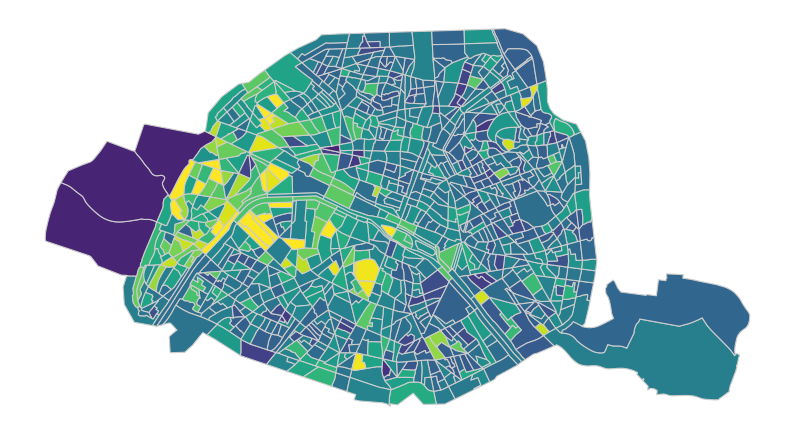

In [ ]:

# Plotting median apartment sizes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the iris polygons
revenuiris.plot(column='median_apartment_size_filled', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, vmin=0, vmax=100)

# Remove axis
ax.set_axis_off()

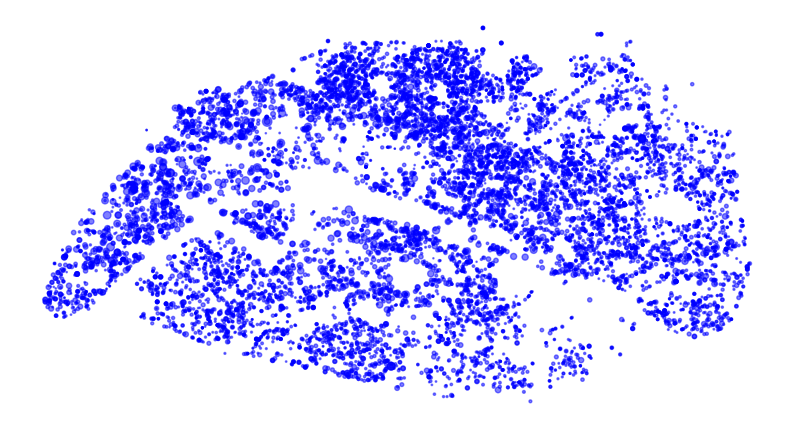

In [ ]:
# Plotting apartment sizes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# scatter plot
apartments_gdf.plot(ax=ax, color='blue', alpha=0.5, markersize=apartments_gdf['surface_reelle_bati'] * 0.1)

# Remove axis
ax.set_axis_off()

### Amenité

In [ ]:
# Perform spatial join between revenuiris and amenite
revenuiris_with_amenities = gpd.sjoin(revenuiris, amenite, how="left", op="contains")

# Group by IRIS and count the number of amenities
amenities_count = revenuiris_with_amenities.groupby('code_iris').size().reset_index(name='amenities_count')

# Merge the amenities count back into revenuiris DataFrame
revenuiris = revenuiris.merge(amenities_count, on='code_iris', how='left')


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


### Immobilier

In [ ]:
revenuiris_with_immob = gpd.sjoin(revenuiris, immobilier, how="left", op="contains")

immob_count = revenuiris_with_immob.groupby('code_iris').size().reset_index(name='immobilier_count')

revenuiris = revenuiris.merge(immob_count, on='code_iris', how='left')


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
# Perform spatial join between revenuiris and apartments
joined_data = gpd.sjoin(revenuiris, apartments_gdf, how="left", op="contains")

# Group by IRIS and calculate the average valeur_fonciere
average_valeur_fonciere = joined_data.groupby('code_iris')['valeur_fonciere'].mean().reset_index()

# Merge the average valeur_fonciere back into revenuiris DataFrame
revenuiris = revenuiris.merge(average_valeur_fonciere, on='code_iris', how='left')
revenuiris.rename(columns={'valeur_fonciere': 'avg_valeur_fonciere'}, inplace=True)
revenuiris

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-27-faa405da5c71>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  joined_data = gpd.sjoin(revenuiris, apartments_gdf, how="left", op="contains")


,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,geometry,DEC_MED20,distance_to_eiffel_tower,distance_to_center,is_west_side,median_apartment_size,median_apartment_size_filled,amenities_count,immobilier_count,avg_valeur_fonciere
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ...",34720,6.072739,4.741721,1,33.750000,33.750000,23,24,1.791785e+05
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ...",22870,5.600529,4.890629,1,41.583333,41.583333,48,66,4.076100e+05
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ...",21030,5.870012,5.043339,1,41.187500,41.187500,35,68,4.377619e+05
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ...",15700,6.411207,4.802243,1,23.000000,23.000000,11,35,2.520000e+05
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ...",12410,6.863844,4.989637,1,NaN,36.931818,41,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,"POLYGON ((2.38437 48.89453, 2.38370 48.89564, ...",17030,10.483992,5.301530,0,36.000000,36.000000,32,52,4.079026e+06
988,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,"POLYGON ((2.35954 48.81888, 2.35952 48.81901, ...",15430,7.762496,4.250256,0,NaN,61.250000,22,1,NaN
989,2375,750004899,75114,54,751145401,H,Parc de Montsouris 1,361226.973089,51415.733963,101504.657933,...,"POLYGON ((2.34398 48.81580, 2.34407 48.81742, ...",ns,6.423184,4.539570,1,NaN,45.058824,12,1,NaN
990,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,"POLYGON ((2.27825 48.83608, 2.27695 48.83638, ...",16910,3.645824,9.088381,1,NaN,38.083333,20,1,NaN


In [ ]:
revenuiris.columns

Index(['OBJECTID', 'n_sq_ir', 'c_cainsee', 'n_qu', 'c_ir', 'c_typeir', 'l_ir',
       'm2_ip', 'm2_pop', 'm2_emp', 'nb_pop', 'nb_pop_n5', 'nb_pop_1999',
       'nb_evo_pop', 'nb_evo_pop_n5', 'pct_evo_pop', 'pct_evo_pop_n5',
       'nb_surface', 'nb_densite', 'nb_p_age_0', 'nb_p_age_5', 'nb_p_age_10',
       'nb_p_age_15', 'nb_p_age_20', 'nb_p_age_25', 'nb_p_age_30',
       'nb_p_age_35', 'nb_p_age_40', 'nb_p_age_45', 'nb_p_age_50',
       'nb_p_age_55', 'nb_p_age_60', 'nb_p_age_65', 'nb_p_age_70',
       'nb_p_age_75', 'nb_p_age_80', 'nb_p_age_85', 'nb_p_age_90p',
       'nb_age_019', 'nb_age_60p', 'nb_age_65p', 'nb_age_75p', 'pct_age_019',
       'pct_age_60p', 'pct_age_65p', 'pct_age_75p', 'nb_age_019_n5',
       'nb_age_60p_n5', 'nb_age_65p_n5', 'nb_age_75p_n5', 'pct_age_019_n5',
       'pct_age_60p_n5', 'pct_age_65p_n5', 'pct_age_75p_n5', 'pct_evo_age_019',
       'pct_evo_age_60p', 'pct_evo_age_65p', 'pct_evo_age_75p', 'nb_etranger',
       'pct_etranger', 'nb_etranger_n5', 'pct_e

## Creating the target variable

In [ ]:
apartments_gdf['prix_per_m2'] = apartments_gdf['valeur_fonciere'] / apartments_gdf['surface_reelle_bati']
apartments_gdf.head(5)

,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,...,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,geometry,prix_per_m2
0,0,2022-1621603,2022-01-06,1,Vente,605000.0,51.0,NaN,RUE CHARLOT,1880,...,3.0,NaN,NaN,NaN,NaN,NaN,2.362871,48.863374,POINT (2.36287 48.86337),14404.761905
1,1,2022-1621616,2022-01-07,1,Vente,660000.0,141.0,NaN,RUE DES POISSONNIERS,7564,...,3.0,NaN,NaN,NaN,NaN,NaN,2.352517,48.895742,POINT (2.35252 48.89574),8148.148148
2,2,2022-1621619,2022-01-07,1,Vente,293000.0,7.0,NaN,RUE SAINT-MARC,8686,...,1.0,NaN,NaN,NaN,NaN,NaN,2.341378,48.870214,POINT (2.34138 48.87021),13318.181818
3,3,2022-1621625,2022-01-05,1,Vente,300000.0,55.0,NaN,RUE STEPHENSON,9092,...,1.0,NaN,NaN,NaN,NaN,NaN,2.355461,48.889540,POINT (2.35546 48.88954),7894.736842
4,4,2022-1621629,2022-01-05,1,Vente,335000.0,75.0,NaN,AV NIEL,6773,...,2.0,NaN,NaN,NaN,NaN,NaN,2.295735,48.882706,POINT (2.29574 48.88271),10151.515152


## Modeling

In [ ]:
print("CRS of apartments_gdf:", apartments_gdf.crs)


CRS of apartments_gdf: None


In [ ]:
# Assuming apartments_gdf coordinates are in WGS84 (EPSG:4326)
apartments_gdf.crs = 'EPSG:4326'

# Set the CRS for revenuiris to match that of apartments_gdf
revenuiris = revenuiris.to_crs(apartments_gdf.crs)


In [ ]:
# Set the CRS for revenuiris to match that of apartments_gdf



# spatial join between apartments and revenuiris
joined_data_price = gpd.sjoin(apartments_gdf, revenuiris, how="inner", op='within')

# Group by iris and median price of apartments for each iris
median_prices_per_m2 = joined_data_price.groupby('nom_iris')['prix_per_m2'].median().reset_index()

revenuiris = revenuiris.merge(median_prices_per_m2, on='nom_iris', how='left')

# Rename the new column to 'median_price_per_m2'
revenuiris.rename(columns={'prix_per_m2': 'median_price_per_m2'}, inplace=True)

revenuiris

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,DEC_MED20,distance_to_eiffel_tower,distance_to_center,is_west_side,median_apartment_size,median_apartment_size_filled,amenities_count,immobilier_count,avg_valeur_fonciere,median_price_per_m2
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,34720,6.072739,4.741721,1,33.750000,33.750000,23,24,1.791785e+05,5506.608466
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,22870,5.600529,4.890629,1,41.583333,41.583333,48,66,4.076100e+05,10030.000000
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,21030,5.870012,5.043339,1,41.187500,41.187500,35,68,4.377619e+05,8586.935705
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,15700,6.411207,4.802243,1,23.000000,23.000000,11,35,2.520000e+05,11230.769231
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,12410,6.863844,4.989637,1,NaN,36.931818,41,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,17030,10.483992,5.301530,0,36.000000,36.000000,32,52,4.079026e+06,8217.391304
988,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,15430,7.762496,4.250256,0,NaN,61.250000,22,1,NaN,NaN
989,2375,750004899,75114,54,751145401,H,Parc de Montsouris 1,361226.973089,51415.733963,101504.657933,...,ns,6.423184,4.539570,1,NaN,45.058824,12,1,NaN,NaN
990,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,16910,3.645824,9.088381,1,NaN,38.083333,20,1,NaN,NaN


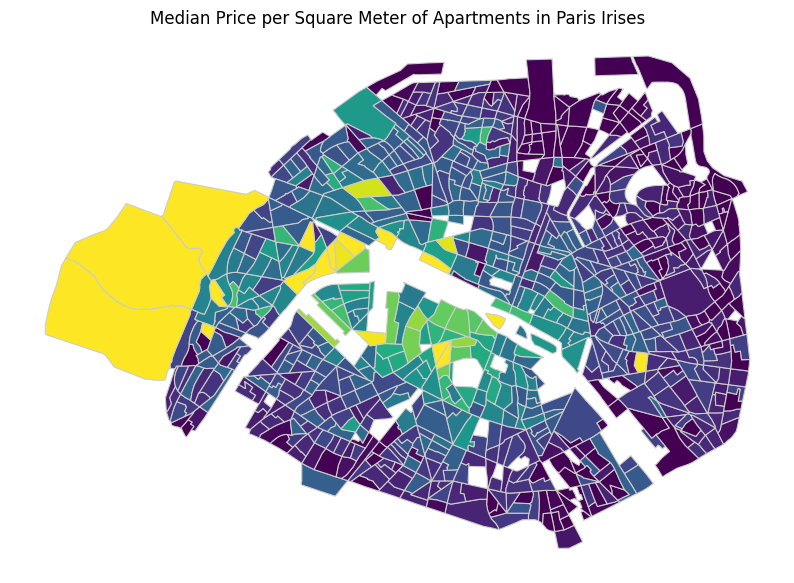

In [ ]:
import matplotlib.pyplot as plt

# Plotting the map with median price per square meter
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the iris polygons
revenuiris.plot(column='median_price_per_m2', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, vmin=9000, vmax=18000)

# Add a title
ax.set_title('Median Price per Square Meter of Apartments in Paris Irises')

# Remove axis
ax.set_axis_off()

# Show the plot
plt.show()


In [ ]:

# Drop NaN values
revenuiris_clean = revenuiris.dropna(subset=['median_price_per_m2'])


# find the nearest non-NaN
def fill_na_nearest(point):
    _, idx = tree.query(extract_centroid(point))
    return revenuiris_clean.iloc[idx]['median_price_per_m2']

# fill NaN values
revenuiris['median_price_per_m2_filled'] = revenuiris.apply(
    lambda row: row['median_price_per_m2'] if not np.isnan(row['median_price_per_m2'])
    else fill_na_nearest(row['geometry']),
    axis=1
)

revenuiris

,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,distance_to_eiffel_tower,distance_to_center,is_west_side,median_apartment_size,median_apartment_size_filled,amenities_count,immobilier_count,avg_valeur_fonciere,median_price_per_m2,median_price_per_m2_filled
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,6.072739,4.741721,1,33.750000,33.750000,23,24,1.791785e+05,5506.608466,5506.608466
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,5.600529,4.890629,1,41.583333,41.583333,48,66,4.076100e+05,10030.000000,10030.000000
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,5.870012,5.043339,1,41.187500,41.187500,35,68,4.377619e+05,8586.935705,8586.935705
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,6.411207,4.802243,1,23.000000,23.000000,11,35,2.520000e+05,11230.769231,11230.769231
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,6.863844,4.989637,1,NaN,36.931818,41,1,NaN,NaN,9600.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,10.483992,5.301530,0,36.000000,36.000000,32,52,4.079026e+06,8217.391304,8217.391304
988,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,7.762496,4.250256,0,NaN,61.250000,22,1,NaN,NaN,11367.559524
989,2375,750004899,75114,54,751145401,H,Parc de Montsouris 1,361226.973089,51415.733963,101504.657933,...,6.423184,4.539570,1,NaN,45.058824,12,1,NaN,NaN,9909.090909
990,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,3.645824,9.088381,1,NaN,38.083333,20,1,NaN,NaN,9863.695090


In [ ]:
# Convert 'DEC_MED20' column to numeric, coercing errors to NaN
revenuiris['DEC_MED20'] = pd.to_numeric(revenuiris['DEC_MED20'], errors='coerce')

# Drop rows with NaN values in 'DEC_MED20' column
revenuiris = revenuiris.dropna(subset=['DEC_MED20'])

# Verify if non-numeric values are dropped
print("Number of non-numeric values in 'DEC_MED20':", revenuiris['DEC_MED20'].apply(lambda x: not np.isnan(x)).sum())


Number of non-numeric values in 'DEC_MED20': 868


In [ ]:
revenuiris

,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,distance_to_eiffel_tower,distance_to_center,is_west_side,median_apartment_size,median_apartment_size_filled,amenities_count,immobilier_count,avg_valeur_fonciere,median_price_per_m2,median_price_per_m2_filled
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,6.072739,4.741721,1,33.750000,33.750000,23,24,1.791785e+05,5506.608466,5506.608466
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,5.600529,4.890629,1,41.583333,41.583333,48,66,4.076100e+05,10030.000000,10030.000000
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,5.870012,5.043339,1,41.187500,41.187500,35,68,4.377619e+05,8586.935705,8586.935705
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,6.411207,4.802243,1,23.000000,23.000000,11,35,2.520000e+05,11230.769231,11230.769231
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,6.863844,4.989637,1,NaN,36.931818,41,1,NaN,NaN,9600.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1800,750004057,75119,73,751197317,H,Villette 17,36411.364147,26477.538502,36411.364147,...,9.351693,4.603747,0,20.400000,20.400000,1,14,2.445338e+05,11421.052632,11421.052632
987,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,10.483992,5.301530,0,36.000000,36.000000,32,52,4.079026e+06,8217.391304,8217.391304
988,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,7.762496,4.250256,0,NaN,61.250000,22,1,NaN,NaN,11367.559524
990,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,3.645824,9.088381,1,NaN,38.083333,20,1,NaN,NaN,9863.695090


### RL

In [ ]:
# Select features and target column
features = ['distance_to_18', 'nb_etranger','m2_pop', 'median_apartment_size_filled', 'immobilier_count', 'amenities_count', 'is_west_side', 'distance_to_eiffel_tower', 'DEC_MED20', 'distance_to_center', 'nb_pop_n5']
target = 'median_price_per_m2'

In [ ]:
from scipy.stats import zscore

# Calculate z-scores for each feature
z_scores = revenuiris[features].apply(zscore)

# Define threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify rows with outliers for any feature
outlier_rows = z_scores[(z_scores > threshold).any(axis=1)]

# Drop rows with outliers
data = revenuiris.drop(outlier_rows.index)

# Check the shape of the new dataset
print("Shape of dataset after removing outliers:", data.shape)


Shape of dataset after removing outliers: (839, 93)


In [ ]:
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

In [ ]:
# Prepare data
X = revenuiris[features]
y = revenuiris[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Concatenate features and target into one DataFrame
data = pd.concat([X_train, y_train], axis=1)

# Summary of NaN values
nan_summary = data.isna().sum()

print("NaN summary:")
print(nan_summary)

# Impute missing values with mean for features
imputer_features = IterativeImputer(max_iter=10, random_state=5)
X_train_imputed = imputer_features.fit_transform(X_train)
X_test_imputed = imputer_features.transform(X_test)

# Impute missing values with mean for target
imputer_target = IterativeImputer(max_iter=10, random_state=5)
y_train_imputed = imputer_target.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer_target.transform(y_test.values.reshape(-1, 1)).ravel()

# Confirm if there are any NaN values after imputation
nan_summary_imputed = np.isnan(X_train_imputed).sum(), np.isnan(X_test_imputed).sum(), np.isnan(y_train_imputed).sum(), np.isnan(y_test_imputed).sum()
print("\nNaN summary after imputation:")
print("NaNs in X_train:", nan_summary_imputed[0])
print("NaNs in X_test:", nan_summary_imputed[1])
print("NaNs in y_train:", nan_summary_imputed[2])
print("NaNs in y_test:", nan_summary_imputed[3])


NaN summary:
distance_to_18                   0
median_apartment_size_filled     0
amenities_count                  0
distance_to_eiffel_tower         0
distance_to_center               0
median_price_per_m2             44
dtype: int64

NaN summary after imputation:
NaNs in X_train: 0
NaNs in X_test: 0
NaNs in y_train: 0
NaNs in y_test: 0


In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train_imputed, y_train_imputed)

# Predictions on the training set
train_predictions = model.predict(X_train_imputed)

# Predictions on the test set
test_predictions = model.predict(X_test_imputed)

# Calculate scores
train_rmse = mean_squared_error(y_train_imputed, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test_imputed, test_predictions, squared=False)
train_r2 = r2_score(y_train_imputed, train_predictions)
test_r2 = r2_score(y_test_imputed, test_predictions)

# Print scores
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)


Train RMSE: 2228.5074736300476
Test RMSE: 1425.0300061792057
Train R^2 Score: 0.19676555167924725
Test R^2 Score: 0.3910312697675512


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X_train_imputed, y_train_imputed, cv=5, scoring='r2')

# Calculate mean R^2 score and standard deviation
mean_cv_r2 = cv_scores.mean()
std_cv_r2 = cv_scores.std()

# Print cross-validation results
print("Cross-Validation R^2 Score (mean):", mean_cv_r2)
print("Cross-Validation R^2 Score (std deviation):", std_cv_r2)


Cross-Validation R^2 Score (mean): 0.3373131607043932
Cross-Validation R^2 Score (std deviation): 0.13665220247882712


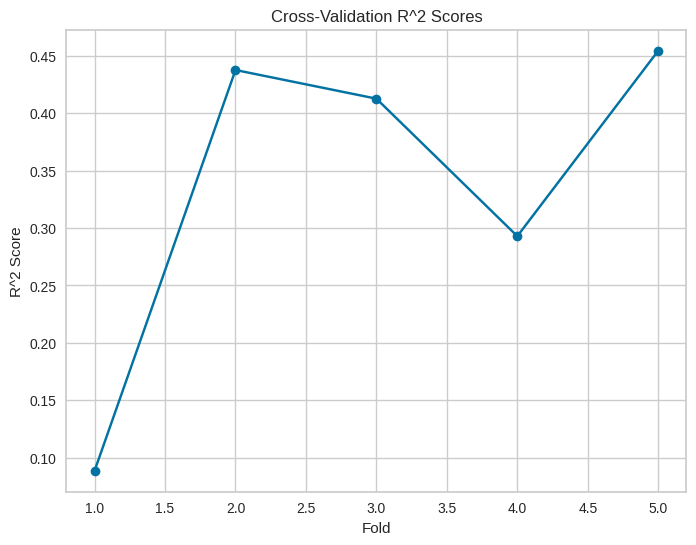

In [ ]:
# Plot cross-validation results
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation R^2 Scores')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Instantiate the estimator (model)
estimator = LinearRegression()

# Instantiate the RFE selector with the model and desired number of features to select
rfe = RFE(estimator, n_features_to_select=5)  # Choose the number of features you want to select

# Fit the RFE selector to your data
rfe.fit(X_train_imputed, y_train_imputed)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features)


Selected Features: Index(['distance_to_18', 'median_apartment_size_filled', 'amenities_count',
       'distance_to_eiffel_tower', 'distance_to_center'],
      dtype='object')


### OLS

In [ ]:
import statsmodels.api as sm
# Fitting
ols_model = sm.OLS(y_train_imputed, X_train_imputed)
ols_results = ols_model.fit()

# Predicting
predictions = ols_results.predict(X_test_imputed)


print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              1317.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):                        0.00
Time:                        15:08:48   Log-Likelihood:                         -6407.1
No. Observations:                 694   AIC:                                  1.283e+04
Df Residuals:                     684   BIC:                                  1.288e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# 1. Evaluate Training and Test Performance
train_predictions = ols_results.predict(X_train_imputed)
test_predictions = ols_results.predict(X_test_imputed)

train_r_squared = r2_score(y_train_imputed, train_predictions)
test_r_squared = r2_score(y_test_imputed, test_predictions)

print("Train R-squared:", train_r_squared)
print("Test R-squared:", test_r_squared)



Train R-squared: 0.11767362962558636
Test R-squared: 0.35743228057516485


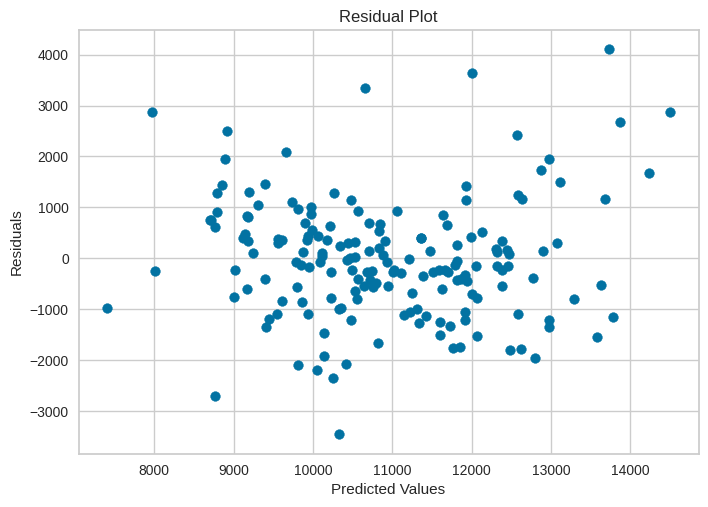

In [ ]:
# 2. Plot Residuals
residuals = y_test_imputed - test_predictions
plt.scatter(test_predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()



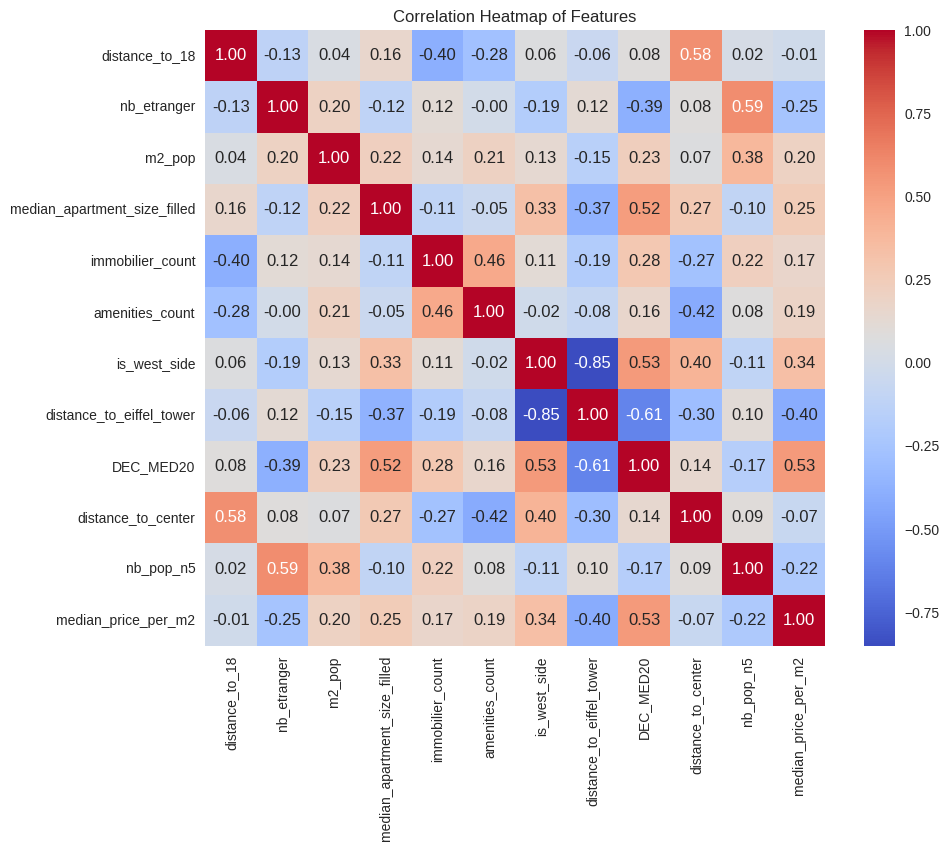

In [ ]:
# Create a DataFrame with selected features and target
data = revenuiris[features + [target]]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


<BarContainer object of 10 artists>

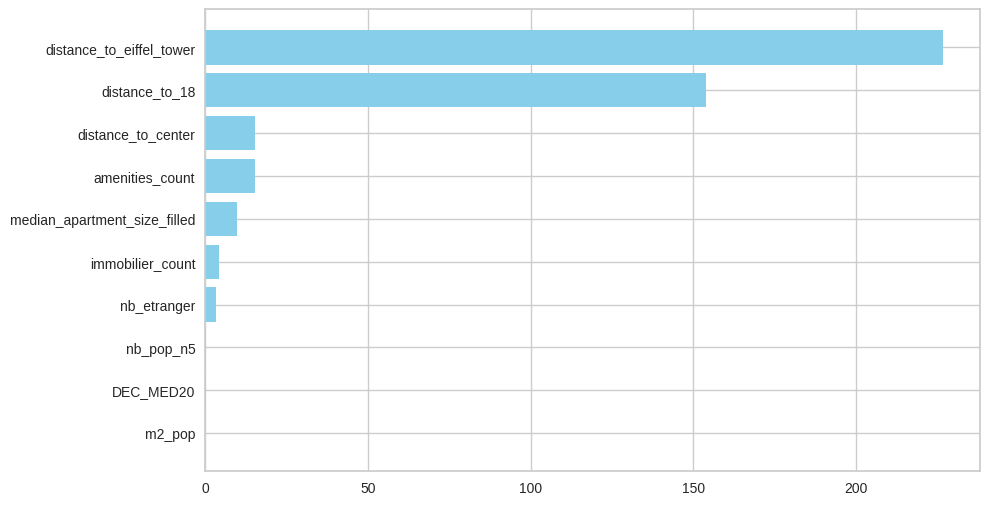

In [ ]:


# Assuming 'model' is your fitted OLS model from Statsmodels
# Replace 'model' with the variable name of your fitted model

# Get the p-values of each coefficient
p_values = ols_results.pvalues

# Get the absolute values of the coefficients
coefficients = np.abs(ols_results.params)

# Create a DataFrame with feature names, coefficients, and p-values
feature_importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients, 'P-value': p_values})

# Sort the DataFrame by absolute coefficients in descending order
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='skyblue')


### PyCaret

In [ ]:
# Find rows with NaN values in the target column
nan_indices = np.argwhere(np.isnan(y_train_imputed)).flatten()

# Print the indices of rows with NaN values in the target
print("Indices of rows with NaN values in the target:", nan_indices)

# Check the corresponding rows in X_train and y_train_imputed
print("Corresponding rows in X_train:", X_train_imputed[nan_indices])
print("Corresponding rows in y_train_imputed:", y_train_imputed[nan_indices])

# Decide on a strategy to handle NaN values in the target


Indices of rows with NaN values in the target: []
Corresponding rows in X_train: []
Corresponding rows in y_train_imputed: []


In [ ]:
cols = ['distance_to_18', 'median_price_per_m2', 'm2_pop', 'median_apartment_size_filled', 'immobilier_count', 'amenities_count', 'is_west_side', 'distance_to_eiffel_tower', 'DEC_MED20', 'distance_to_center', 'nb_pop_n5']
data = revenuiris[cols]
data.dropna(subset=['median_price_per_m2'], inplace=True)
data

,distance_to_18,median_price_per_m2,m2_pop,median_apartment_size_filled,immobilier_count,amenities_count,is_west_side,distance_to_eiffel_tower,DEC_MED20,distance_to_center,nb_pop_n5
0,1.119255,5506.608466,42891.780556,33.750000,24,23,1,6.072739,34720.0,4.741721,2433.114091
1,1.630268,10030.000000,51939.489210,41.583333,66,48,1,5.600529,22870.0,4.890629,3767.025902
2,1.556785,8586.935705,43233.728108,41.187500,68,35,1,5.870012,21030.0,5.043339,3778.410350
3,0.934233,11230.769231,37176.576688,23.000000,35,11,1,6.411207,15700.0,4.802243,3382.878410
7,0.888013,9694.444444,44844.084407,39.592593,112,60,0,6.683837,28550.0,3.250680,3831.440396
...,...,...,...,...,...,...,...,...,...,...,...
861,3.606372,7552.238806,24879.592056,36.285714,38,18,0,9.863998,22410.0,4.808508,3392.563701
862,3.320921,8787.878788,42591.627187,39.461538,81,64,0,9.606760,22710.0,4.664757,3727.073132
863,2.991211,11421.052632,26477.538502,20.400000,14,1,0,9.351693,16670.0,4.603747,2265.442677
864,4.210906,8217.391304,36597.775090,36.000000,52,32,0,10.483992,17030.0,5.301530,2430.233467


In [ ]:
from scipy.stats import zscore

# Calculate z-scores for each feature
z_scores = data[cols].apply(zscore)

# Define threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify rows with outliers for any feature
outlier_rows = z_scores[(z_scores > threshold).any(axis=1)]

# Drop rows with outliers
data = data.drop(outlier_rows.index)

# Check the shape of the new dataset
print("Shape of dataset after removing outliers:", data.shape)


Shape of dataset after removing outliers: (761, 11)


In [ ]:
from pycaret.regression import *

# Initialize the regression setup
reg_setup = setup(data=data, target='median_price_per_m2', train_size=0.8, normalize=True, preprocess=True, session_id=42)

# Compare models
best_model = compare_models(fold=5, sort='R2')

# Finalize the best model
final_model = finalize_model(best_model)

# Evaluate the final model
evaluate_model(final_model)


,Description,Value
0,Session id,42
1,Target,median_price_per_m2
2,Target type,Regression
3,Original data shape,"(761, 11)"
4,Transformed data shape,"(761, 11)"
5,Transformed train set shape,"(608, 11)"
6,Transformed test set shape,"(153, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,844.8650,1311506.3195,1143.7334,0.5680,0.1113,0.0823,0.2760
rf,Random Forest Regressor,853.4209,1353678.6987,1160.5838,0.5575,0.1125,0.0831,0.4020
gbr,Gradient Boosting Regressor,873.0948,1360340.5397,1164.3914,0.5540,0.1127,0.0848,0.3100
lightgbm,Light Gradient Boosting Machine,877.6893,1396816.8256,1179.3577,0.5405,0.1156,0.0858,0.2600
br,Bayesian Ridge,908.5486,1473238.0238,1208.7122,0.5212,0.1171,0.0887,0.0340
ridge,Ridge Regression,909.6706,1473994.7466,1209.1165,0.5207,0.1172,0.0888,0.0320
lr,Linear Regression,909.8404,1474209.3311,1209.2165,0.5206,0.1172,0.0888,1.3020
lasso,Lasso Regression,909.5663,1474116.9247,1209.1679,0.5206,0.1172,0.0888,0.0460
llar,Lasso Least Angle Regression,909.5664,1474114.9169,1209.1670,0.5206,0.1172,0.0888,0.0300
huber,Huber Regressor,904.9535,1479884.1699,1210.9612,0.5192,0.1170,0.0881,0.0420


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Phase 3

## Visualization

In [ ]:
!pip install autoviz


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class


In [ ]:
ParisHousing.shape

(10000, 17)

In [10]:
df = ParisHousing


In [ ]:

AV = AutoViz_Class()

dft = AV.AutoViz(
    filename="",
    sep="",
    depVar="price",
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=1000,
    max_cols_analyzed=30,
)

    Since nrows is smaller than dataset, loading random sample of 1000 rows into pandas...
Shape of your Data Set loaded: (1000, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  10
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  5
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    16 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
S

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
squareMeters,int64,0.000000,99,163.000000,99999.000000,No issue
numberOfRooms,int64,0.000000,10,1.000000,100.000000,No issue
hasYard,int64,0.000000,0,0.000000,1.000000,No issue
hasPool,int64,0.000000,0,0.000000,1.000000,No issue
floors,int64,0.000000,10,1.000000,100.000000,No issue
cityCode,int64,0.000000,99,11.000000,99504.000000,No issue
cityPartRange,int64,0.000000,1,1.000000,10.000000,No issue
numPrevOwners,int64,0.000000,1,1.000000,10.000000,No issue
made,int64,0.000000,3,1990.000000,2021.000000,Possible date-time colum: transform before modeling step.
isNewBuilt,int64,0.000000,0,0.000000,1.000000,No issue


Number of All Scatter Plots = 55
Could not draw some Distribution Plots
Could not draw some Time Series plots
All Plots done
Time to run AutoViz = 16 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []

    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)

    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()

    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [ ]:
def show_corr_heatmap(df, title):

    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, fmt=".2f", square=True, mask = mask)
    plt.show()

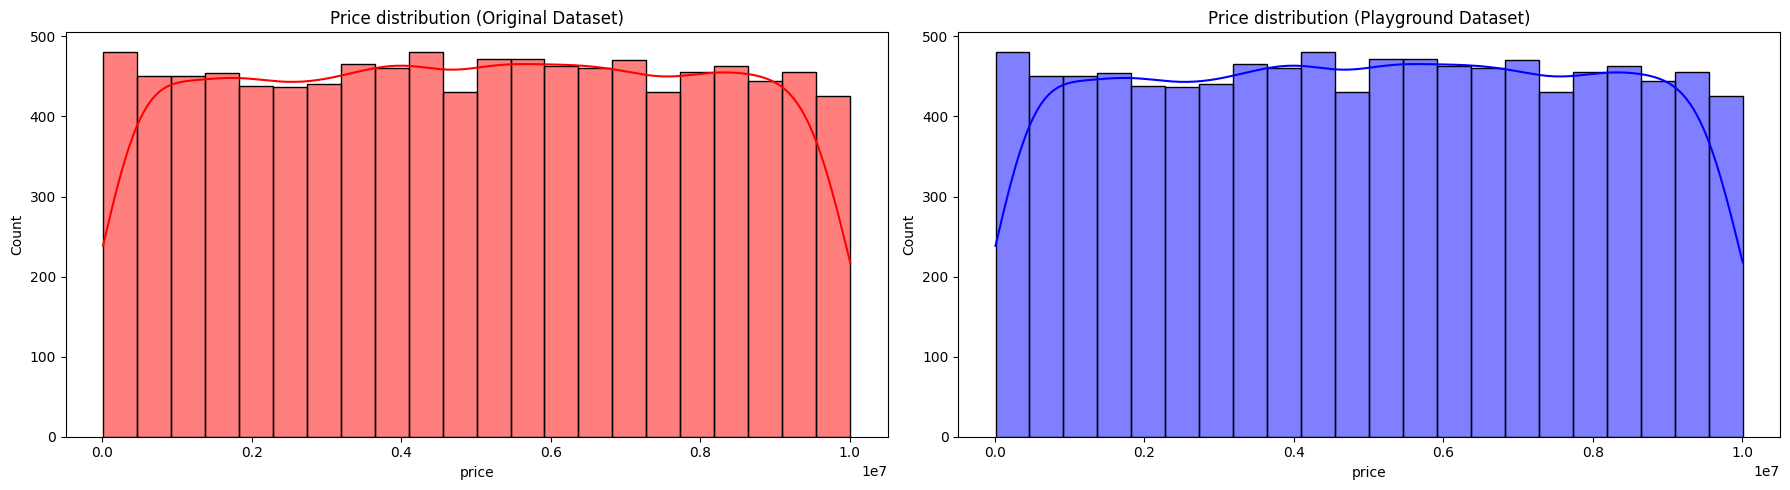

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(df['price'], color="red", ax=ax[0], kde=True)
ax[0].set_title("Price distribution (Original Dataset)", fontsize=12)


sns.histplot(df['price'], color="blue", ax=ax[1], kde=True)
ax[1].set_title("Price distribution (Playground Dataset)", fontsize=12)


plt.tight_layout()
plt.show()

## Modeling

### xgboost

In [ ]:
NUM_COLS = ["squareMeters", "numberOfRooms", "floors", "numPrevOwners", "basement", "attic", "garage"]

In [11]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['squareMeters',
 'numberOfRooms',
 'hasYard',
 'hasPool',
 'floors',
 'cityCode',
 'cityPartRange',
 'numPrevOwners',
 'made',
 'isNewBuilt',
 'hasStormProtector',
 'basement',
 'attic',
 'garage',
 'hasStorageRoom',
 'hasGuestRoom',
 'price']

In [12]:
LR = 0.24
NE = 2000

In [13]:
target_column = 'price'
num_cols.remove(target_column)

In [14]:
X = df[num_cols]
y = df['price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from xgboost import XGBRegressor


In [17]:
model = XGBRegressor(max_depth=3, learning_rate=LR , n_estimators=NE, objective="reg:linear", booster="gbtree")
XGB=model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:00:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define model parameters
max_depth = 3
learning_rate = LR  # Assuming LR is defined
n_estimators = NE  # Assuming NE is defined

# Create XGBRegressor model
model = XGBRegressor(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, objective="reg:squarederror", booster="gbtree")

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate metrics
train_rmse = mean_squared_error(y_train, y_pred_train)
test_rmse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)


Train RMSE: 32071103.905374337
Test RMSE: 199630519.3358251
Train R^2 Score: 0.9999960670325992
Test R^2 Score: 0.9999772078913454


### LR

In [20]:
import statsmodels.api as sm
# Fitting
ols_model = sm.OLS(y_train, X_train)
ols_results = ols_model.fit()

# Predicting
predictions = ols_results.predict(X_test)


print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.576e+09
Date:                Sat, 09 Mar 2024   Prob (F-statistic):                        0.00
Time:                        06:00:46   Log-Likelihood:                         -71711.
No. Observations:                8000   AIC:                                  1.435e+05
Df Residuals:                    7984   BIC:                                  1.436e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


In [25]:
# Define the model
model = make_pipeline(StandardScaler(), LinearRegression())

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

Cross-validation scores: [0.99999953 0.99999956 0.99999959 0.99999958 0.99999956]
Mean R-squared: 0.9999995636099099


In [27]:
# overfitting check
model.fit(X_train, y_train)


# Predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared for both sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

Training R-squared: 0.9999995615399574
Test R-squared: 0.9999995780555567
